In [69]:
import numpy as np
import random
from scipy.misc import derivative
import matplotlib.pyplot as plt

v_max = 10
p_c = 5
m = 10

In [68]:

class numberline:
    def __init__(self) -> None:
        self.position = 0  # position
        self.velocity = 0  # velocity
        self.time = 0
        self.update_state()
        self.position_list = []
        self.velocity_list = []
        self.observation_list = []
        
    def phi(self,y):
        return 2 * np.cos(y)
    
    def sim_input(self, t):
        return 1

    def update_state(self):
        self.state = (self.position,self.velocity)
    
    def h(self):
        return self.position + self._noise_sensor(self.velocity)
    
    def f(self,sys_input,dt):
        # from @alexswerdlow
        # update state
        self.position = self.velocity * dt
        has_crashed = random.uniform(0, 1) < ((np.abs(self.state[1]) - v_max) * p_c)/v_max
        if has_crashed:
            self.velocity = 0
        else:
            self.velocity = self.state[1] + (1 / m) * self._net_force(sys_input) + self._noise_dynamics(self.state[1])
        
        self.update_state()
    
    def _net_force(self, input_force):
        f_net = input_force + derivative(self.phi, self.state[0]) 
        return f_net
    
    def _noise_sensor(self,v):
        return np.random.normal(0, 0.5*v)
    
    def _noise_dynamics(self,v):
        return np.random.normal(0, 0.1*v)
        
    def update_variables_to_plot(self):
        self.position_list.append(self.state[0])
        self.velocity_list.append(self.state[1])
        self.observation_list.append(self.h())
        self.update_state()
    
    def vars_to_plot(self):
        return [self.position_list,self.velocity_list,self.observation_list]
    
    def cleanup_variable_store(self):
        self.position_list = []
        self.velocity_list = []
        self.observation_list = []


In [64]:

class DTCS:
    def __init__(self, dt, model) -> None:
        self.t = 0
        self.dt = dt
        self.model = model
        self.time = []
        
    def update_step(self):
        self.model.f(self.model.sim_input(self.t),self.dt)
        self.t += self.dt

    def get_output(self):
        return self.model.h()

    def get_time(self):
        return self.t
    
    def plot(self,variables):
        pass

    def run_simulator(self,no_of_steps):
        for i in range(no_of_steps):
            self.model.update_variables_to_plot()
            self.time.append(self.get_time())
            self.update_step()
    
    def plot(self):
        vars_to_plot = self.model.vars_to_plot()
        for varlist in vars_to_plot:
            plt.plot(self.time,varlist)

        plt.xlabel("Time")
        plt.show()


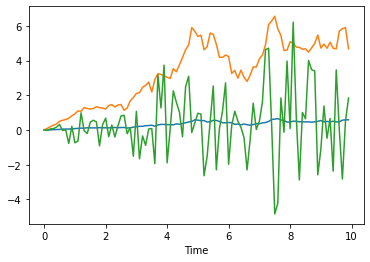

In [65]:
sim1 = DTCS(0.1,numberline())
sim1.run_simulator(100)
sim1.plot()